<a href="https://colab.research.google.com/github/SonDongBin/python-file/blob/master/kaggle_titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석
---
타이타닉 생존자 예측을 위한 데이터 분석을 진행하겠습니다. 먼저 분석을 위해서 훈련용(train.csv) 데이터를 불러 오겠습니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 

# 훈련용 데이터 불러오기 
train = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 결측치 확인
---
[]

In [2]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

[]

# 분석용 차트 생성 함수
---
생존 여부(Survived)와 각 칼럼 간의 관계를 파이 차트로 분석하기 위해 공통 함수를 아래와 같이 구현하였습니다.

* show_pie_chart
    * []
* bsurvived_crosstab
    - []
- pie_chart
    - []

In [3]:
def show_pie_chart(df, col_name):
    colname_survived = survived_crosstab(train, col_name)
    # print(colname_survived.head(5))
    pie_chart(colname_survived)
    return colname_survived

def survived_crosstab(df, col_name):
    '''col_name과 Survived간의 교차도표 생성'''
    feature_survived = pd.crosstab(df[col_name], df['Survived'])
    feature_survived.columns = feature_survived.columns.map({0:"Dead", 1:"Alive"})
    # print(feature_survived.shape)
    return feature_survived

In [4]:
def pie_chart(feature_survived):
    '''
    pie_chart 생성
    pcol, prow = 차트를 출력할 개수. pcol * prow 만큼의 차트 출력 
    '''
    frows, fcols = feature_survived.shape
    pcol = 3
    prow = (frows/pcol + frows%pcol)
    prow = int(prow)                 # row number has to be integer
    plot_height = prow * 2.5
    plt.figure(figsize=(8, plot_height))

    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)

        index_name = feature_survived.index[row]
        plt.pie(feature_survived.loc[index_name], labels=feature_survived.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{0}' survived".format(index_name))

    plt.show()

# Sex
---
[]

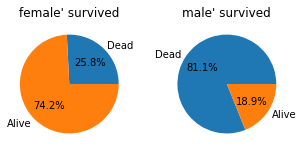

Survived,Dead,Alive
Sex,,
female,81,233
male,468,109


In [5]:
c = show_pie_chart(train, 'Sex')
c

> []

# Embarked
---
[]

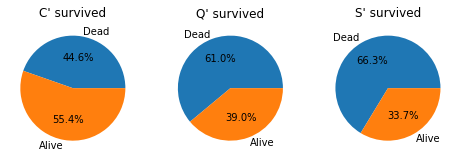

Survived,Dead,Alive
Embarked,,
C,75,93
Q,47,30
S,427,217


In [6]:
c = show_pie_chart(train, 'Embarked')
c

> []

# Name
---
[]

In [7]:
# 호칭 추출 
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.')
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

> []

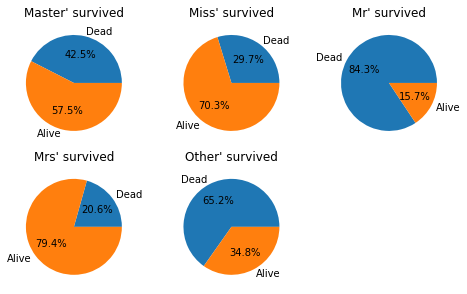

Survived,Dead,Alive
Title,,
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Other,15,8


In [8]:
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].replace('Ms', 'Miss')   
train['Title'].value_counts()

c = show_pie_chart(train, 'Title')
c

> []

# Age
---
[]

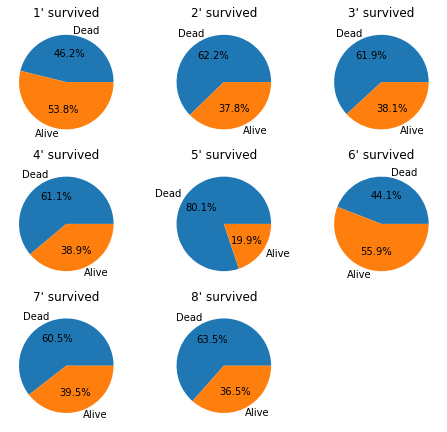

Survived,Dead,Alive
AgeCategory,,
1,54,63
2,79,48
3,60,37
4,66,42
5,125,31
6,30,38
7,69,45
8,66,38


In [9]:
meanAge = train[['Title', 'Age']].groupby(['Title']).mean()
for index, row in meanAge.iterrows():
    nullIndex = train[(train.Title == index) & (train.Age.isnull())].index
    train.loc[nullIndex, 'Age'] = row[0]

train['AgeCategory'] = pd.qcut(train.Age, 8, labels=range(1, 9))
train.AgeCategory = train.AgeCategory.astype(int)

c = show_pie_chart(train, 'AgeCategory')
c

> []

# Cabin
---
[]

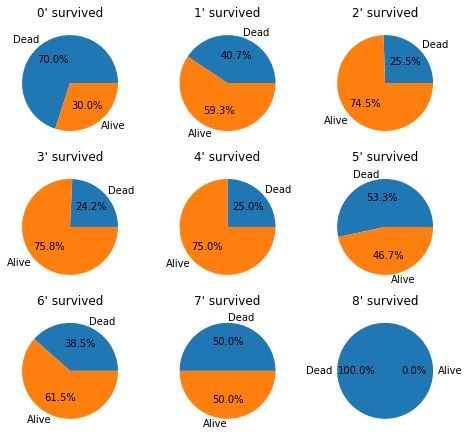

Survived,Dead,Alive
CabinCategory,,
0,481,206
1,24,35
2,12,35
3,8,25
4,8,24
5,8,7
6,5,8
7,2,2
8,1,0


In [10]:
train.Cabin.fillna('N', inplace=True)
train["CabinCategory"] = train["Cabin"].str.slice(start=0, stop=1)  
train["CabinCategory"] = train['CabinCategory'].map({ "N": 0, "C": 1, "B": 2, "D": 3, "E": 4, "A": 5, "F": 6, "G": 7, "T": 8 })

c = show_pie_chart(train, 'CabinCategory')
c

> []

# Fare
---
[]

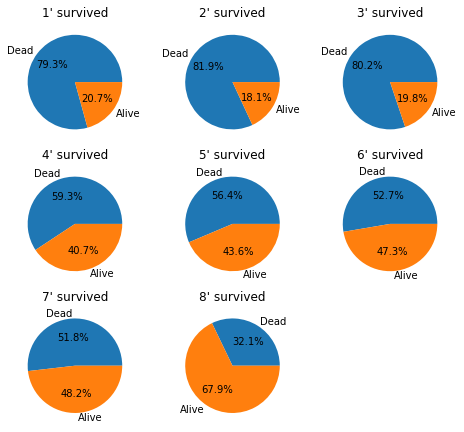

Survived,Dead,Alive
FareCategory,,
1,111,29
2,68,15
3,89,22
4,67,46
5,62,48
6,59,53
7,57,53
8,36,76


In [11]:
train.Fare.fillna(0) # test.csv 데이터에 결측치가 존재함.
train['FareCategory'] = pd.qcut(train.Fare, 8, labels=range(1, 9))
train.FareCategory = train.FareCategory.astype(int)

c = show_pie_chart(train, 'FareCategory')
c

> []

# SibSp, Parch
---
[]

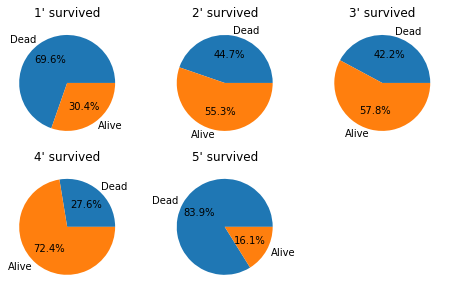

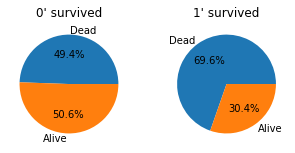

Survived,Dead,Alive
IsAlone,,
0,175,179
1,374,163


In [12]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
train.loc[train["Family"] > 4, "Family"] = 5

train['IsAlone'] = 1
train.loc[train['Family'] > 1, 'IsAlone'] = 0


c = show_pie_chart(train, 'Family')
c

c = show_pie_chart(train, 'IsAlone')
c

> []

# Ticket
---
[]

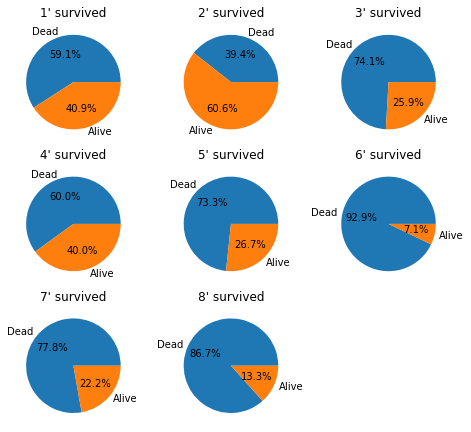

Survived,Dead,Alive
TicketCategory,,
1,136,94
2,91,140
3,272,95
4,6,4
5,11,4
6,13,1
7,7,2
8,13,2


In [13]:
# STON/O2. 3101282를 ['STON/O2.', '3101282']로 변경하고, '3101282'의 첫 번째 3을 선택 
train['TicketCategory'] = train.Ticket.str.split() # 공백으로 분리 
train['TicketCategory'] = [i[-1][0] for i in train['TicketCategory']] # 
train['TicketCategory'] = train['TicketCategory'].replace(['8', '9', 'L'], '8')
train['TicketCategory'] = pd.factorize(train['TicketCategory'])[0] + 1

c = show_pie_chart(train, 'TicketCategory')
c

> []

# 마무리
---
[]

# 전처리

In [14]:
test = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/test.csv")

def feature_engineering(df):
    # Sex
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

    # Embarked
    df.Embarked.fillna('S', inplace=True)
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

    # Title
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.')
    df['Title'] = df['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs':3, 'Other':4})

    # Age
    meanAge = df[['Title', 'Age']].groupby(['Title']).mean()
    for index, row in meanAge.iterrows():
        nullIndex = df[(df.Title == index) & (df.Age.isnull())].index
        df.loc[nullIndex, 'Age'] = row[0]

    df['AgeCategory'] = pd.qcut(df.Age, 8, labels=range(1, 9))
    df.AgeCategory = df.AgeCategory.astype(int)

    # Cabin
    df.Cabin.fillna('N', inplace=True)
    df["CabinCategory"] = df["Cabin"].str.slice(start=0, stop=1)
    df["CabinCategory"] = df['CabinCategory'].map({ "N": 0, "C": 1, "B": 2, "D": 3, "E": 4, "A": 5, "F": 6, "G": 7, "T": 8 })

    # Fare
    df.Fare.fillna(0, inplace=True)
    df['FareCategory'] = pd.qcut(df.Fare, 8, labels=range(1, 9))
    df.FareCategory = df.FareCategory.astype(int)

    # SibSp, Parch
    df['Family'] = df['SibSp'] + df['Parch'] + 1
    df.loc[df["Family"] > 4, "Family"] = 5

    df['IsAlone'] = 1
    df.loc[df['Family'] > 1, 'IsAlone'] = 0

    # Ticket
    df['TicketCategory'] = df.Ticket.str.split()
    df['TicketCategory'] = [i[-1][0] for i in df['TicketCategory']]
    df['TicketCategory'] = df['TicketCategory'].replace(['8', '9', 'L'], '8')
    df['TicketCategory'] = pd.factorize(df['TicketCategory'])[0] + 1

    df.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Name', 'Age', 'SibSp', 'Parch'], axis=1, inplace=True)

    return df

train = feature_engineering(train)
test = feature_engineering(test)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Survived        891 non-null    int64
 1   Pclass          891 non-null    int64
 2   Sex             891 non-null    int64
 3   Embarked        891 non-null    int64
 4   Title           891 non-null    int64
 5   AgeCategory     891 non-null    int64
 6   CabinCategory   891 non-null    int64
 7   FareCategory    891 non-null    int64
 8   Family          891 non-null    int64
 9   IsAlone         891 non-null    int64
 10  TicketCategory  891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Pclass          418 non-null    int64
 1   Sex             418 non-null    int64
 2   Embarked      

# 머신러닝

In [15]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#  Pclass, Sex, Embarked, Title, AgeCategory, CabinCategory, FareCategory, Family, IsAlone, TicketCategory 
data = train.drop('Survived', axis=1).values
# Survived
target = train['Survived'].values

In [16]:
# test_size: 분리 비율 설정. 
# stratify: 분리 기준이 될 데이터 
# random_state: 랜덤 seed
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.4, stratify=target, random_state=0)

## 랜덤 포레스트 검증 #1

In [17]:
rf = RandomForestClassifier(n_estimators=50, criterion="entropy", max_depth=5, oob_score=True, random_state=10)
rf.fit(x_train, y_train)
prediction = rf.predict(x_valid)

length = y_valid.shape[0]
accuracy = accuracy_score(prediction, y_valid)
print(f'총 {length}명 중 {accuracy * 100:.3f}% 정확도로 생존을 맞춤')

# 결과 

총 357명 중 82.913% 정확도로 생존을 맞춤


## 랜덤 포레스트 검증 #2

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

RF_classifier = RandomForestClassifier()

RF_paramgrid = {
    'max_depth' : [6, 8, 10, 15],
    'n_estimators': [50, 100, 300, 500, 700, 800, 900],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 7, 15, 30],
    'min_samples_leaf': [1, 15, 30, 60],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
    }

k_fold = StratifiedKFold(n_splits=5)
RF_classifiergrid = GridSearchCV(RF_classifier, param_grid = RF_paramgrid, cv=k_fold, scoring="accuracy", n_jobs= -1, verbose=1)

RF_classifiergrid.fit(x_train, y_train)

rf = RF_classifiergrid.best_estimator_

Fitting 5 folds for each of 1792 candidates, totalling 8960 fits


In [20]:
# Best Score
print(RF_classifiergrid.best_score_)

# Best Parameter
print(RF_classifiergrid.best_params_)

# Best Model
print(RF_classifiergrid.best_estimator_)

0.835178980779404
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 900}
RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=7, n_estimators=900)


### 예측 모델에 영향을 미친 특성 확인

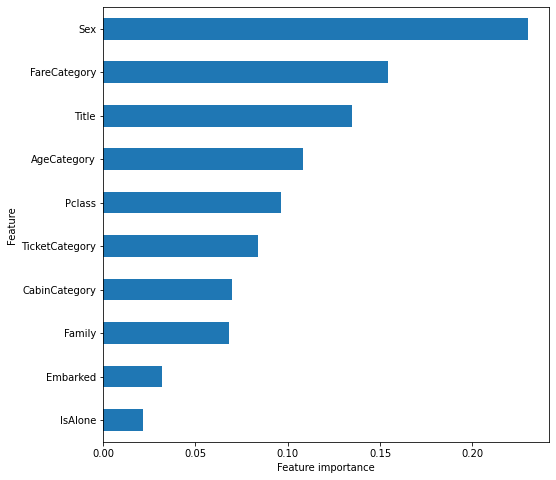

In [21]:
import matplotlib.pyplot as plt
from pandas import Series

feature_importance = rf.feature_importances_
fi = Series(feature_importance, index=train.drop(['Survived'], axis=1).columns)

plt.figure(figsize=(8, 8))
fi.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# 여러 알고리즘 적용

In [22]:
import pandas as pd

# 훈련용 데이터 불러오기 
train = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
# 지도학습 모델 import
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feature_engineering(train)

# data 분리 
data = train.drop('Survived', axis=1)#.values
target = train['Survived']#.values
x_train, y_train, x_valid, y_valid = train_test_split(data, target, test_size=0.4, stratify=target, random_state=0)

# print(data)
# # x_train.drop(['PassengerId', 'Ticket', 'Cabin', 'Fare', 'Name', 'SibSp', 'Parch'], axis=1, inplace=True) 왜 안돼ㅐㅐㅐㅐ
# # x_train = pd.DataFrame(x_train)
# # print(x_train)
# print(x_train)

model = RandomForestClassifier()

# 모델 적용 함수 
def ml_fit(model):
    model.fit(x_train, x_valid)
    prediction = model.predict(y_train)
    accuracy = accuracy_score(prediction, y_valid)
    print(model)
    print(f'총 {y_valid.shape[0]}명 중 {accuracy * 100:.3f}% 정확도로 생존을 맞춤')
    return model

# 기본 설정으로만 테스트 
model = ml_fit(RandomForestClassifier(n_estimators=100))
model = ml_fit(LogisticRegression(solver='lbfgs'))
model = ml_fit(SVC(gamma='scale'))
model = ml_fit(KNeighborsClassifier())
model = ml_fit(GaussianNB())
model = ml_fit(DecisionTreeClassifier())

RandomForestClassifier()
총 357명 중 80.952% 정확도로 생존을 맞춤
LogisticRegression()
총 357명 중 79.832% 정확도로 생존을 맞춤
SVC()
총 357명 중 81.513% 정확도로 생존을 맞춤
KNeighborsClassifier()
총 357명 중 76.471% 정확도로 생존을 맞춤
GaussianNB()
총 357명 중 73.389% 정확도로 생존을 맞춤
DecisionTreeClassifier()
총 357명 중 78.151% 정확도로 생존을 맞춤


In [24]:
model = ml_fit(RandomForestClassifier(n_estimators=50, criterion="entropy", max_depth=5, oob_score=True, random_state=10))

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=50,
                       oob_score=True, random_state=10)
총 357명 중 82.913% 정확도로 생존을 맞춤


# 제출

In [25]:
prediction = rf.predict(test)
prediction 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [26]:
submission = pd.read_csv("https://raw.githubusercontent.com/developer-sdk/kaggle-python-beginner/master/datas/kaggle-titanic/gender_submission.csv")
submission['Survived'] = prediction
submission.to_csv(r'titanic_submission_20220413_last.csv', index=False)